In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('books_task.csv').drop(columns=['Unnamed: 0'])
pd.set_option('display.max_rows', None)

df.head()

,Title,description,authors,publisher,publishedDate,categories,Impact
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],Smithsonian Institution,1996,['Comics & Graphic Novels'],784.303924
1,Dr. Seuss: American Icon,"Philip Nel takes a fascinating look into the key aspects of Seuss's career - his poetry, politics, art, marketing, and place in the popular imagination."" ""Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like ""nerd."" And Seuss's famously loopy artistic style - what Nel terms an ""energetic cartoon surrealism"" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover",['Philip Nel'],A&C Black,2005-01-01,['Biography & Autobiography'],825.465535
2,Wonderful Worship in Smaller Churches,"This resource includes twelve principles in understanding small church worship, fifteen practices for planning worship with fewer than 100 people, and suggestions for congregational study.",['David R. Ray'],OUP USA,2000,['Religion'],841.705321
3,Whispers of the Wicked Saints,"Julia Thomas finds her life spinning out of control after the death of her husband, Richard. Julia turns to her minister for comfort when she finds herself falling for him with a passion that is forbidden by the church. Heath Sparks is a man of God who is busy taking care of his quadriplegic wife who was seriously injured in a sever car accident. In an innocent effort to reach out to a lonely member of his church, Heath finds himself as the man and not the minister as Heath and Julia surrender their bodies to each other and face the wrath of God. Julia finds herself in over her head as she faces a deadly disease, the loss of her home and whispers about her wicked affair. Julia leaves the states offering her body as a living sacrifice in hopes of finding a cure while her heart remains thousands of miles away hoping to one day reunite with the man who holds it hostage.Whispers of the Wicked Saints is a once in a lifetime romance that is breath taking, defying all the rules of romance and bending the laws of love.",['Veronica Haddon'],iUniverse,2005-02,['Fiction'],666.426542
4,The Church of Christ: A Biblical Ecclesiology for Today,"In The Church of Christ: A Biblical Ecclesiology for Today, respected biblical scholar Everett Ferguson presents a genuine biblical theology of the church. By systematically examining the New Testament's teaching on the existence, meaning, and purpose of the church, providing responsible coverage of the traditional topics in ecclesiology, and carefully grounding ecclesiology in the person and work of Christ, Ferguson unveils a comprehensive model of the church that is both biblically centered and relevant to a world on the verge of the twenty-first century.",['Everett Ferguson'],Wm. B. Eerdmans Publishing,1996,['Religion'],806.216143


In [2]:
df.shape

(138724, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138724 entries, 0 to 138723
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Title          138724 non-null  object 
 1   description    125975 non-null  object 
 2   authors        136001 non-null  object 
 3   publisher      138724 non-null  object 
 4   publishedDate  138376 non-null  object 
 5   categories     138724 non-null  object 
 6   Impact         138724 non-null  float64
dtypes: float64(1), object(6)
memory usage: 7.4+ MB


In [4]:
100*df.isnull().sum()/df.shape[0]

Title            0.000000
description      9.190191
authors          1.962890
publisher        0.000000
publishedDate    0.250858
categories       0.000000
Impact           0.000000
dtype: float64

In [5]:
# Impact analysis
# can be rounded off 
# highly left skewed
df['Impact'].describe()

count    138724.000000
mean        786.763662
std          63.640350
min           0.000000
25%         763.039309
50%         805.568540
75%         819.108336
max        1000.000000
Name: Impact, dtype: float64

In [6]:
df['Impact'].describe(np.arange(0.9,1.01,0.01))

count    138724.000000
mean        786.763662
std          63.640350
min           0.000000
50%         805.568540
90%         845.466483
91%         851.231326
92%         852.353062
93%         857.569370
94%         860.352454
95%         867.188361
96%         873.683536
97%         881.095969
98%         892.367703
99%         908.820357
100%       1000.000000
max        1000.000000
Name: Impact, dtype: float64

In [7]:
df['Impact'].describe(np.arange(0,0.11,0.01))

count    138724.000000
mean        786.763662
std          63.640350
min           0.000000
0%            0.000000
1%          553.152251
2%          607.791811
3%          638.811570
4%          659.542530
5%          672.481842
6%          684.019708
7%          699.433981
8%          700.297059
9%          714.204668
10%         718.381365
50%         805.568540
max        1000.000000
Name: Impact, dtype: float64

<Axes: xlabel='Impact', ylabel='Count'>

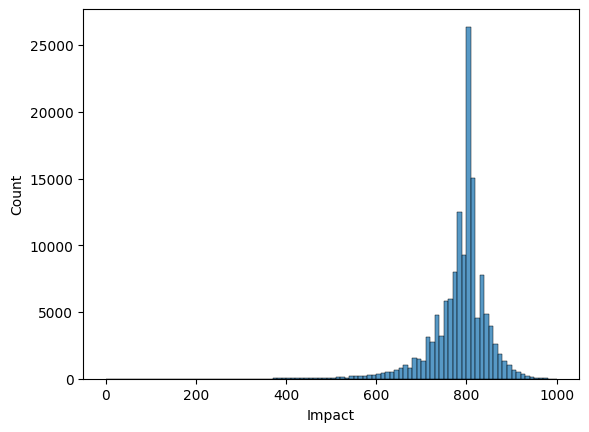

In [8]:
sns.histplot(df, x='Impact', bins=100)

In [9]:
#Title analysis
# data cleaning required.
df['Title'].describe()

count                             138724
unique                            138724
top       Its Only Art If Its Well Hung!
freq                                   1
Name: Title, dtype: object

In [10]:
df['title_length'] = df['Title'].apply(len)
df['title_length'].describe()

count    138724.000000
mean         46.542076
std          29.592533
min           1.000000
25%          23.000000
50%          41.000000
75%          63.000000
max         346.000000
Name: title_length, dtype: float64

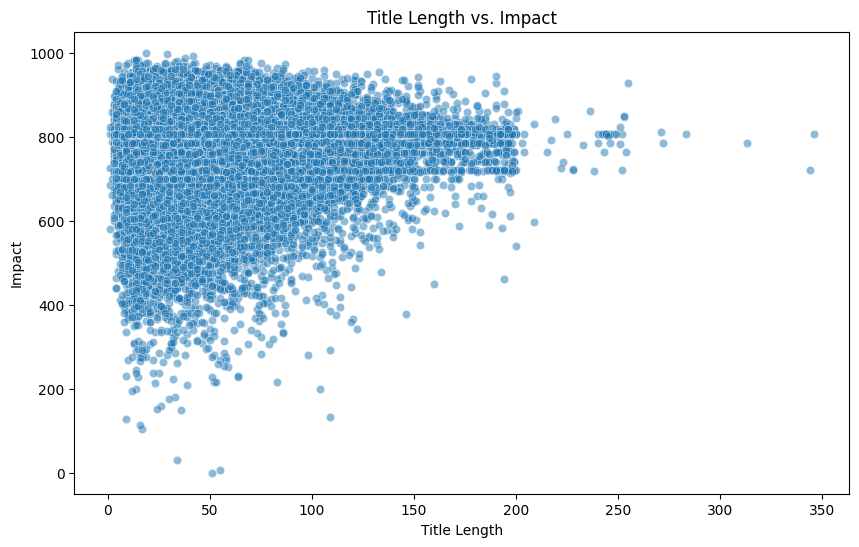

In [11]:
# scatter plot of title length vs. impact
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='title_length', y='Impact', alpha=0.5)
plt.title('Title Length vs. Impact')
plt.xlabel('Title Length')
plt.ylabel('Impact')
plt.show()




In [33]:
# correlation coefficient
correlation = df['title_length'].corr(df['Impact'], method='spearman')
print(f"Correlation coefficient between title length and impact: {correlation:.4f}")

Correlation coefficient between title length and impact: 0.0011


In [13]:
df['Title'].head(10).reset_index()

,index,Title
0,0,Its Only Art If Its Well Hung!
1,1,Dr. Seuss: American Icon
2,2,Wonderful Worship in Smaller Churches
3,3,Whispers of the Wicked Saints
4,4,The Church of Christ: A Biblical Ecclesiology for Today
5,5,Saint Hyacinth of Poland
6,6,Rising Sons and Daughters: Life Among Japan's New Young
7,7,Muslim Women's Choices: Religious Belief and Social Reality (Cross Cultural Perspectives on Women)
8,8,Dramatica for Screenwriters
9,9,Mensa Number Puzzles (Mensa Word Games for Kids)


In [14]:
# description analysis
# data cleaning required.
# can be truncated
df['description'].describe()

count                    125975
unique                   116931
top       Publisher Description
freq                         54
Name: description, dtype: object

In [15]:
df['description']= df['description'].fillna('')
df['description_length'] = df['description'].apply(len)
df['description_length'].describe()

count    138724.000000
mean        617.465356
std         611.038682
min           0.000000
25%         169.000000
50%         410.000000
75%         945.000000
max       21662.000000
Name: description_length, dtype: float64

In [16]:
df['description_length'].describe(np.arange(0.9,1.01,0.01))

count    138724.000000
mean        617.465356
std         611.038682
min           0.000000
50%         410.000000
90%        1426.000000
91%        1474.000000
92%        1528.000000
93%        1593.000000
94%        1663.000000
95%        1747.000000
96%        1851.000000
97%        1989.000000
98%        2181.000000
99%        2542.770000
100%      21662.000000
max       21662.000000
Name: description_length, dtype: float64

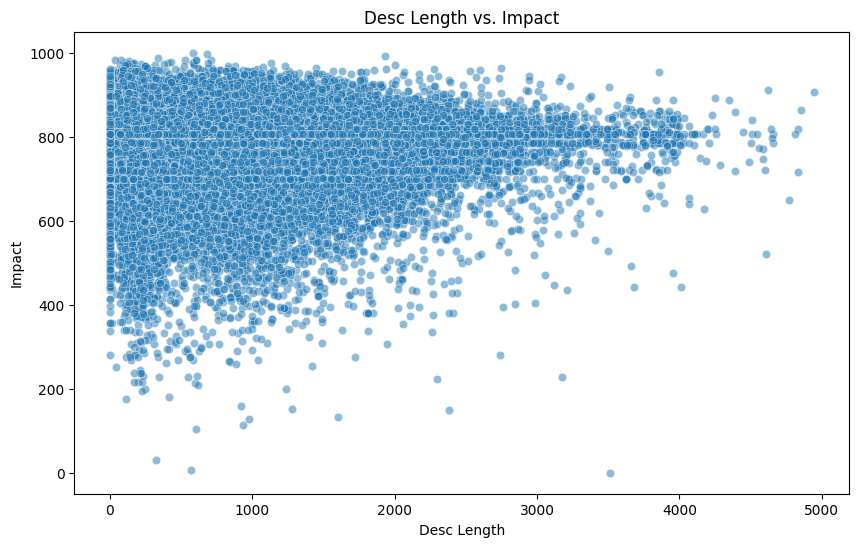

In [18]:
# scatter plot of description length vs. impact
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df.description_length<=5000], x='description_length', y='Impact', alpha=0.5)
plt.title('Desc Length vs. Impact')
plt.xlabel('Desc Length')
plt.ylabel('Impact')
plt.show()

In [32]:
# correlation coefficient
correlation = df['description_length'].corr(df['Impact'], method='spearman')
print(f"Correlation coefficient between description length and impact: {correlation:.4f}")

Correlation coefficient between description length and impact: -0.0310


In [20]:
df[df['description'] != '']['description'].head(5).reset_index()




,index,description
0,1,"Philip Nel takes a fascinating look into the key aspects of Seuss's career - his poetry, politics, art, marketing, and place in the popular imagination."" ""Nel argues convincingly that Dr. Seuss is one of the most influential poets in America. His nonsense verse, like that of Lewis Carroll and Edward Lear, has changed language itself, giving us new words like ""nerd."" And Seuss's famously loopy artistic style - what Nel terms an ""energetic cartoon surrealism"" - has been equally important, inspiring artists like filmmaker Tim Burton and illustrator Lane Smith. --from back cover"
1,2,"This resource includes twelve principles in understanding small church worship, fifteen practices for planning worship with fewer than 100 people, and suggestions for congregational study."
2,3,"Julia Thomas finds her life spinning out of control after the death of her husband, Richard. Julia turns to her minister for comfort when she finds herself falling for him with a passion that is forbidden by the church. Heath Sparks is a man of God who is busy taking care of his quadriplegic wife who was seriously injured in a sever car accident. In an innocent effort to reach out to a lonely member of his church, Heath finds himself as the man and not the minister as Heath and Julia surrender their bodies to each other and face the wrath of God. Julia finds herself in over her head as she faces a deadly disease, the loss of her home and whispers about her wicked affair. Julia leaves the states offering her body as a living sacrifice in hopes of finding a cure while her heart remains thousands of miles away hoping to one day reunite with the man who holds it hostage.Whispers of the Wicked Saints is a once in a lifetime romance that is breath taking, defying all the rules of romance and bending the laws of love."
3,4,"In The Church of Christ: A Biblical Ecclesiology for Today, respected biblical scholar Everett Ferguson presents a genuine biblical theology of the church. By systematically examining the New Testament's teaching on the existence, meaning, and purpose of the church, providing responsible coverage of the traditional topics in ecclesiology, and carefully grounding ecclesiology in the person and work of Christ, Ferguson unveils a comprehensive model of the church that is both biblically centered and relevant to a world on the verge of the twenty-first century."
4,5,"The story for children 10 and up of St. Hyacinth, the Dominican who planted the Faith in Poland, Lithuania and Russia and worked many miracles. He went to Rome, where he met St. Dominic, and was one of the first to receive at his hands the habit of the newly established Order of Friars Preachers. After his novitiate he made his religious profession, and was made superior of the little band of missionaries sent to Poland to preach. Impr. 189 pgs 16 Illus, PB"


In [41]:
# author analysis
# Noisy data
# majority of the author have single entry
df['authors'].describe()

count            136001
unique            97801
top       ['Rose Arny']
freq                236
Name: authors, dtype: object

In [22]:
df['authors'] = df['authors'].fillna('')
df['authors_clean'] = df['authors'].str.strip('[]').str.replace("'", "").str.replace('"', '').str.strip()
df['authors_clean'] = df['authors_clean'].replace('', np.nan)
df['authors_list'] = df['authors_clean'].str.split(',').apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])
df['author_count'] = df['authors_list'].apply(len)
df['author_count'].describe()

count    138724.000000
mean          1.283138
std           0.942188
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         110.000000
Name: author_count, dtype: float64

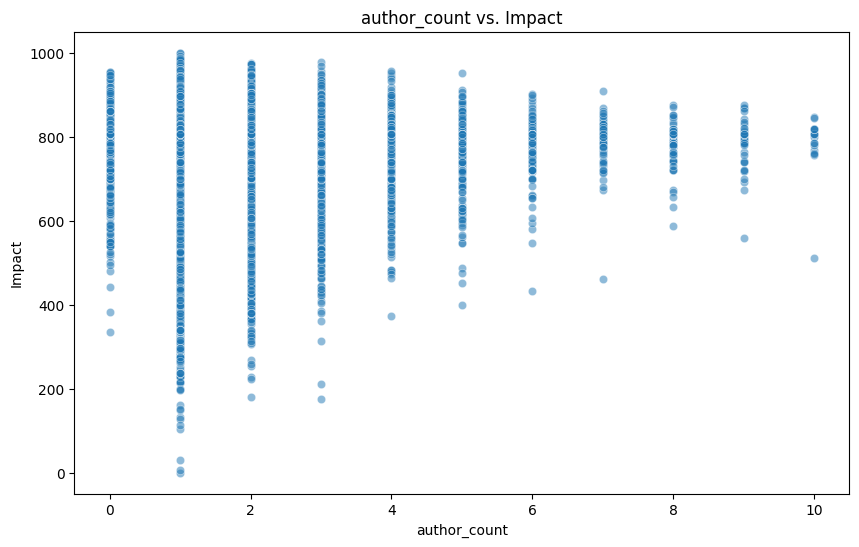

In [29]:
# scatter plot of author count vs. impact
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df[df.author_count<=10], x='author_count', y='Impact', alpha=0.5)
plt.title('author_count vs. Impact')
plt.xlabel('author_count')
plt.ylabel('Impact')
plt.show()

In [31]:
# Spearman rank correlation coefficient
correlation = df['author_count'].corr(df['Impact'], method='spearman')
print(f"Correlation coefficient between author_count and impact: {correlation:.4f}")

Correlation coefficient between author_count and impact: -0.0104


In [23]:
df[['authors','authors_clean','authors_list','author_count']].head(10)

,authors,authors_clean,authors_list,author_count
0,['Julie Strain'],Julie Strain,[Julie Strain],1
1,['Philip Nel'],Philip Nel,[Philip Nel],1
2,['David R. Ray'],David R. Ray,[David R. Ray],1
3,['Veronica Haddon'],Veronica Haddon,[Veronica Haddon],1
4,['Everett Ferguson'],Everett Ferguson,[Everett Ferguson],1
5,['Mary Fabyan Windeatt'],Mary Fabyan Windeatt,[Mary Fabyan Windeatt],1
6,['Steven Wardell'],Steven Wardell,[Steven Wardell],1
7,"['Camillia Fawzi El-Solh', 'Judy Mabro']","Camillia Fawzi El-Solh, Judy Mabro","[Camillia Fawzi El-Solh, Judy Mabro]",2
8,['Armando Salda A-Mora'],Armando Salda A-Mora,[Armando Salda A-Mora],1
9,['Evelyn B. Christensen'],Evelyn B. Christensen,[Evelyn B. Christensen],1


In [25]:
df[df['author_count']==110]['authors_list'].head(10).reset_index()

,index,authors_list
0,74264,"[Mary Shelley, H. P. Lovecraft, H. G. Wells, Edgar Allan Poe, Henry James, Hugh Walpole, M. R. James, Wilkie Collins, E. F. Benson, Nathaniel Hawthorne, Ambrose Bierce, Arthur Machen, William Hope Hodgson, Arthur Conan Doyle, Grant Allen, Bram Stoker, Théophile Gautier, Richard Marsh, Joseph Sheridan Le Fanu, Thomas Hardy, Charles Dickens, Rudyard Kipling, Guy de Maupassant, Elizabeth Gaskell, Mark Twain, Daniel Defoe, Jerome K. Jerome, Fitz-James OBrien, Catherine Crowe, Émile Erckmann, Alexandre Chatrian, Pedro De Alarçon, Amelia B. Edwards, Washington Irving, John Meade Falkner, Harriet Beecher Stowe, Mary E. Wilkins Freeman, Louisa M. Alcott, Edith Nesbit, Mary Louisa Molesworth, Francis Marion Crawford, John Kendrick Bangs, John Buchan, Sabine Baring-Gould, Cleveland Moffett, Louis Tracy, Nikolai Gogol, James Malcolm Rymer, Thomas Peckett Prest, Frederick Marryat, Oscar Wilde, Robert Louis Stevenson, Charlotte Perkins Gilman, W. W. Jacobs, H. H. Munro (Saki), Wilhelm Hauff, Mary Elizabeth Braddon, Robert W. Chambers, Edward Bulwer-Lytton, Thomas De Quincey, William Makepeace Thackeray, E. T. A. Hoffmann, Robert E. Howard, David Lindsay, Marie Belloc Lowndes, Edward Bellamy, Jack London, Pliny the Younger, Helena Blavatsky, Fergus Hume, Florence Marryat, Villiers de lIsle Adam, William Archer, William F. Harvey, Katherine Rickford, Ralph Adams Cram, Leopold Kompert, Brander Matthews, Vincent OSullivan, Ellis Parker Butler, A. T. Quiller-Couch, Fiona Macleod, Lafcadio Hearn, William T. Stead, Gambier Bolton, Andrew Jackson Davis, Nizida, Walter F. Prince, Chester Bailey Fernando, Leonard Kip, Frank R. Stockton, Bithia Mary Croker, Catherine L. Pirkis, Leonid Andreyev, Anatole France, Richard Le Gallienne, Lucy Maud Montgomery, Stanley G. Weinbaum, Horace Walpole, William Thomas Beckford, ...]"


In [26]:
authors_exploded = df[['authors_list', 'Impact']].explode('authors_list')
authors_exploded.head(10)

,authors_list,Impact
0,Julie Strain,784.303924
1,Philip Nel,825.465535
2,David R. Ray,841.705321
3,Veronica Haddon,666.426542
4,Everett Ferguson,806.216143
5,Mary Fabyan Windeatt,799.162610
6,Steven Wardell,793.504900
7,Camillia Fawzi El-Solh,759.271158
7,Judy Mabro,759.271158
8,Armando Salda A-Mora,847.021372


In [27]:
author_impact = authors_exploded.groupby('authors_list').agg({
    'Impact': ['mean', 'count']
}).reset_index()
author_impact.columns = ['author', 'average_impact', 'frequency']
author_impact.head()

,author,average_impact,frequency
0,,791.966180,101
1,& Christopher,812.285783,1
2,&. Associates OReilly &. Associates,805.568540,1
3,(),859.810559,2
4,(D-R),783.964622,1


In [36]:
author_impact['frequency'].max()

236

<Axes: xlabel='average_impact', ylabel='Count'>

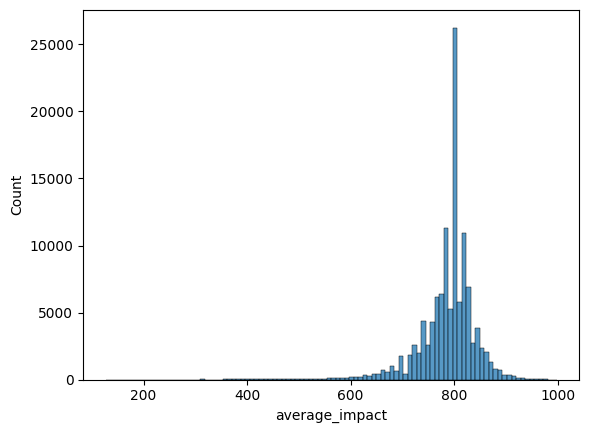

In [34]:
# distribution of average impact
# highly left skewed similar to Impact distribution
sns.histplot(author_impact, x='average_impact', bins=100)

<Axes: xlabel='frequency', ylabel='Count'>

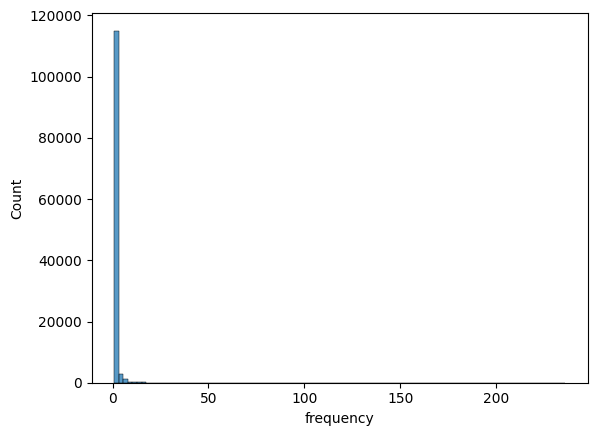

In [39]:
# distribution of frequency
# majority of the authors have single entry
sns.histplot(author_impact, x='frequency', bins=100)

In [40]:
# publisher analysis
df['publisher'].describe()

count              138724
unique              12855
top       Tan Books & Pub
freq                 3635
Name: publisher, dtype: object

In [42]:
df['publisher'].value_counts(normalize=True).reset_index().sort_values(by='publisher', ascending=False).head(10)

,index,publisher
0,Tan Books & Pub,0.026203
1,Simon and Schuster,0.025951
2,Smithsonian Institution,0.023183
3,Penguin,0.020097
4,Wm. B. Eerdmans Publishing,0.018476
5,Routledge,0.017091
6,John Wiley & Sons,0.014302
7,Harper Collins,0.014122
8,Cambridge University Press,0.010654
9,A&C Black,0.009768


In [43]:
# Calculate publishers' average impact and frequency
publisher_impact = df.groupby('publisher').agg({
    'Impact': ['mean', 'count']
}).reset_index()

publisher_impact.columns = ['publisher', 'average_impact', 'frequency']
publisher_impact.head()



,publisher,average_impact,frequency
0,"""O'Reilly Media, Inc.""",745.214529,251
1,"'The Rosen Publishing Group, Inc'",839.373144,1
2,*A Wiley-QED Publication,774.724016,1
3,*Frommers,737.516147,49
4,*Howell Book House,780.395249,111


<Axes: xlabel='average_impact', ylabel='Count'>

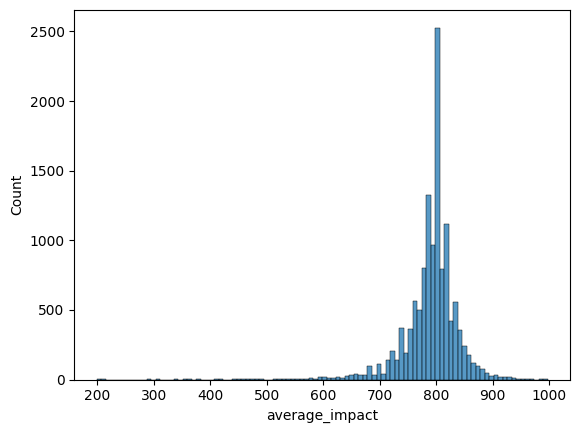

In [46]:
# distribution of average impact
sns.histplot(publisher_impact, x='average_impact', bins=100)

<Axes: xlabel='frequency', ylabel='Count'>

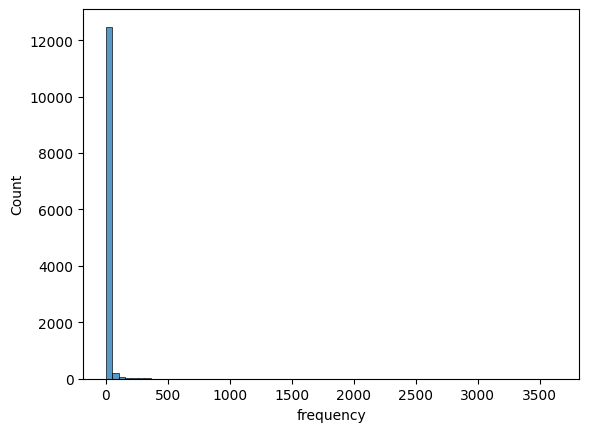

In [51]:
#distribution of frequency
sns.histplot(publisher_impact, x='frequency', bins=70)

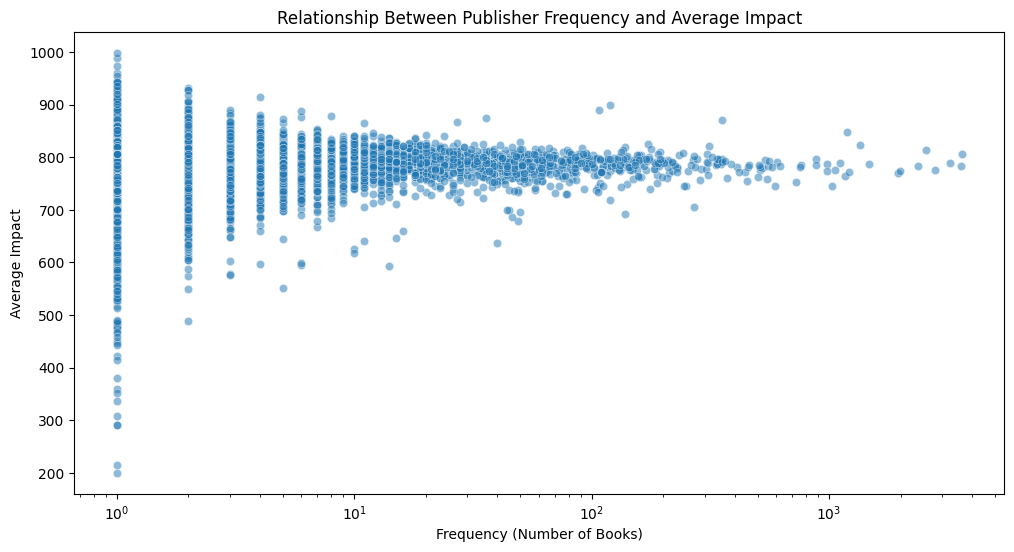

In [45]:
#  relationship between frequency and average impact
plt.figure(figsize=(12, 6))
sns.scatterplot(data=publisher_impact, x='frequency', y='average_impact', alpha=0.5)
plt.title('Relationship Between Publisher Frequency and Average Impact')
plt.xlabel('Frequency (Number of Books)')
plt.ylabel('Average Impact')
plt.xscale('log')  
plt.show()

In [52]:
# publishedDate analysis
# only year and month can be extracted.
# month has high number of missing values.
df['publishedDate'].head(10)

0          1996
1    2005-01-01
2          2000
3       2005-02
4          1996
5    2009-01-01
6          1995
7    1994-02-17
8       2005-07
9    2018-11-06
Name: publishedDate, dtype: object

In [53]:
df['publishedDate'] =  df['publishedDate'].fillna('')
df['publishedDate_new'] = df['publishedDate'].str.slice(0,7)
df[['publishedDate','publishedDate_new']].head(2)

,publishedDate,publishedDate_new
0,1996,1996
1,2005-01-01,2005-01


In [54]:
date_parts = df['publishedDate'].astype(str).str.split('-', expand=True)
for col in date_parts.columns:
    date_parts[col] = date_parts[col].str.strip()
df['published_year'] = date_parts[0]
df['published_month'] = date_parts[1]
df[['published_year','published_month']].describe()

,published_year,published_month
count,138724,83891
unique,257,12
top,2004,01
freq,7196,11558


In [56]:
df['published_year'].value_counts(normalize=True).reset_index().sort_values(by='published_year', ascending=False).head(10)

,index,published_year
0,2004,0.051873
1,2005,0.050287
2,2003,0.048975
3,2002,0.046135
4,2000,0.043850
5,2001,0.042221
6,1999,0.039488
7,2012,0.036583
8,2013,0.035026
9,1998,0.034623


In [127]:
df[df.published_year=='1975*'][['publishedDate','publishedDate_new','published_year']].head(10)

,publishedDate,publishedDate_new,published_year
114332,1975*,1975*,1975*


In [58]:
df['published_month'].value_counts(normalize=True).reset_index().sort_values(by='published_month', ascending=False).head(20)

,index,published_month
0,1.0,0.137774
1,10.0,0.090594
2,9.0,0.086446
3,4.0,0.085146
4,3.0,0.081964
5,6.0,0.076635
6,12.0,0.075753
7,5.0,0.075610
8,8.0,0.075276
9,11.0,0.074978


In [57]:
df['published_year'] = pd.to_numeric(df['published_year'], errors='coerce')
df['published_month'] = pd.to_numeric(df['published_month'], errors='coerce')
df[['published_year','published_month']].isna().sum()

published_year       384
published_month    54833
dtype: int64

In [59]:
yearly_impact = df.groupby('published_year')['Impact'].mean().reset_index()

correlation = yearly_impact['published_year'].corr(yearly_impact['Impact'], method='spearman')
print(f"Correlation coefficient between published_year and impact: {correlation:.4f}")

Correlation coefficient between published_year and impact: -0.0361


     published_year      Impact
233          2030.0  834.414650
149          1940.0  818.149091
140          1931.0  816.540260
165          1956.0  811.063965
141          1932.0  810.282987
161          1952.0  806.683684
138          1929.0  806.632332
168          1959.0  806.066373
232          2023.0  805.906908
122          1913.0  804.633016


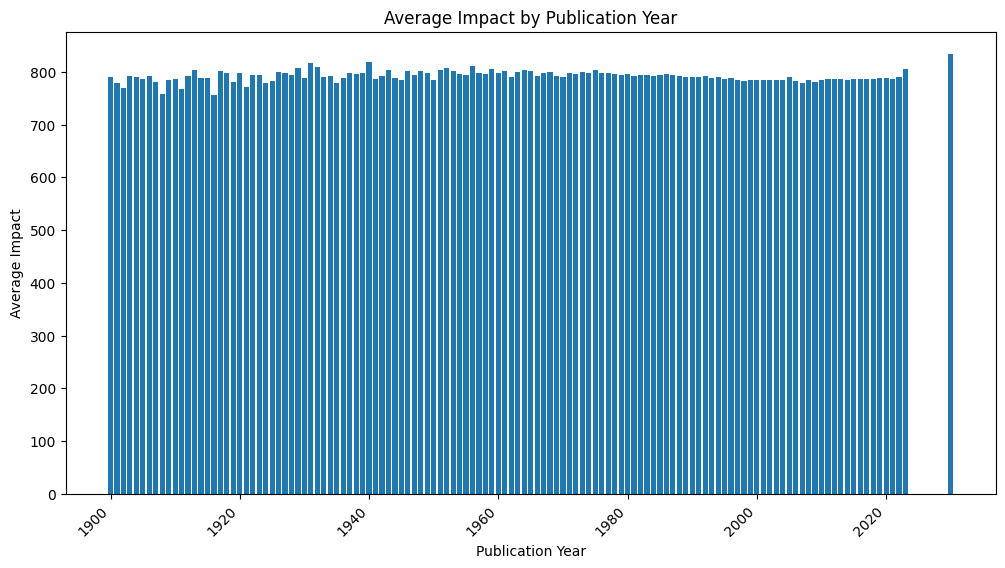

In [64]:
yearly_impact = yearly_impact[yearly_impact['published_year']>=1900]


plt.figure(figsize=(12, 6))
plt.bar(yearly_impact['published_year'], yearly_impact['Impact'])


plt.title('Average Impact by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Impact')

plt.xticks(rotation=45, ha='right')



print(yearly_impact.sort_values('Impact', ascending=False).head(10))



In [65]:
#categories analysis
df['categories'].describe()

count          138724
unique            100
top       ['Fiction']
freq            23419
Name: categories, dtype: object

In [66]:
df['categories'].value_counts(normalize=True).reset_index().sort_values(by='categories', ascending=False).head(10)

,index,categories
0,['Fiction'],0.168817
1,['Religion'],0.068186
2,['History'],0.067256
3,['Juvenile Fiction'],0.047886
4,['Biography & Autobiography'],0.045587
5,['Business & Economics'],0.040548
6,['Computers'],0.031083
7,['Social Science'],0.027638
8,['Juvenile Nonfiction'],0.024841
9,['Science'],0.018908


     published_year      Impact
233          2030.0  834.414650
149          1940.0  818.149091
140          1931.0  816.540260
165          1956.0  811.063965
141          1932.0  810.282987
161          1952.0  806.683684
138          1929.0  806.632332
168          1959.0  806.066373
232          2023.0  805.906908
122          1913.0  804.633016


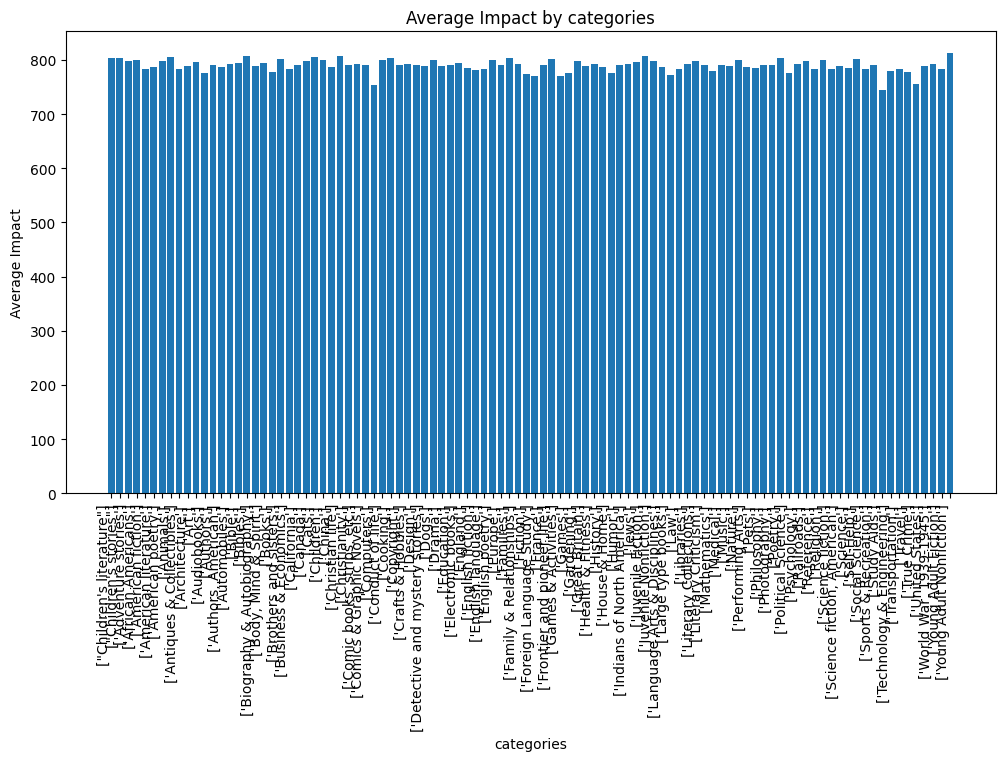

In [70]:
category_impact = df.groupby('categories')['Impact'].mean().reset_index()


plt.figure(figsize=(12, 6))
plt.bar(category_impact['categories'], category_impact['Impact'])


plt.title('Average Impact by categories')
plt.xlabel('categories')
plt.ylabel('Average Impact')

plt.xticks(rotation=90, ha='right')



print(yearly_impact.sort_values('Impact', ascending=False).head(10))